In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
c21=pd.read_csv('players_21.csv',low_memory=False)


In [4]:
c22=pd.read_csv('players_22.csv', low_memory=False)

In [5]:
object_columns = c21.select_dtypes(include=['object']).columns
c21 = c21.drop(columns=object_columns) # i drop all the columns that contiains object, the reason is, they were of any significant value to the model i am about creating 

In [6]:
object_columns = c22.select_dtypes(include=['object']).columns
c22 = c22.drop(columns=object_columns) # i drop all the columns that contiains object, they were of any significant value to the model i am about creating

In [7]:
c21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 60 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sofifa_id                    18944 non-null  int64  
 1   overall                      18944 non-null  int64  
 2   potential                    18944 non-null  int64  
 3   value_eur                    18707 non-null  float64
 4   wage_eur                     18719 non-null  float64
 5   age                          18944 non-null  int64  
 6   height_cm                    18944 non-null  int64  
 7   weight_kg                    18944 non-null  int64  
 8   club_team_id                 18719 non-null  float64
 9   league_level                 18719 non-null  float64
 10  club_jersey_number           18719 non-null  float64
 11  club_contract_valid_until    18719 non-null  float64
 12  nationality_id               18944 non-null  int64  
 13  nation_team_id  

In [8]:
c22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 60 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sofifa_id                    19239 non-null  int64  
 1   overall                      19239 non-null  int64  
 2   potential                    19239 non-null  int64  
 3   value_eur                    19165 non-null  float64
 4   wage_eur                     19178 non-null  float64
 5   age                          19239 non-null  int64  
 6   height_cm                    19239 non-null  int64  
 7   weight_kg                    19239 non-null  int64  
 8   club_team_id                 19178 non-null  float64
 9   league_level                 19178 non-null  float64
 10  club_jersey_number           19178 non-null  float64
 11  club_contract_valid_until    19178 non-null  float64
 12  nationality_id               19239 non-null  int64  
 13  nation_team_id  

In [9]:
c21.corr()['overall'].sort_values(ascending=False) #this help to see the value of each variable and it effect on the model

overall                        1.000000
movement_reactions             0.867234
passing                        0.711521
mentality_composure            0.705252
dribbling                      0.641097
potential                      0.636366
release_clause_eur             0.626277
wage_eur                       0.592452
value_eur                      0.558493
power_shot_power               0.558372
physic                         0.530386
mentality_vision               0.509087
attacking_short_passing        0.502191
goalkeeping_speed              0.497350
shooting                       0.488315
skill_long_passing             0.487147
age                            0.468197
skill_ball_control             0.449372
international_reputation       0.440987
skill_curve                    0.420495
attacking_crossing             0.410530
power_long_shots               0.407525
mentality_aggression           0.401920
skill_fk_accuracy              0.385617
power_stamina                  0.381869


In [10]:
c22.corr()['overall'].sort_values(ascending=False)#this help to see the value of each variable and it effect on the model

overall                        1.000000
movement_reactions             0.871823
passing                        0.715001
mentality_composure            0.708867
dribbling                      0.666402
potential                      0.644275
wage_eur                       0.601764
power_shot_power               0.561180
value_eur                      0.554684
release_clause_eur             0.545197
physic                         0.529234
mentality_vision               0.523025
attacking_short_passing        0.516788
goalkeeping_speed              0.499533
skill_long_passing             0.498216
shooting                       0.489623
international_reputation       0.470647
skill_ball_control             0.460411
age                            0.459451
skill_curve                    0.420423
power_long_shots               0.410010
attacking_crossing             0.401356
mentality_aggression           0.400161
power_stamina                  0.385150
skill_dribbling                0.384351


In [11]:
selected_columns_21 = c21.corr()['overall'][c21.corr()['overall'] > 0.45].index.tolist()
selected_columns_21 = c21[selected_columns_21]
selected_columns_21    # i took the variables of which their value is greater than 4.5 because they have huge effect on the model and to make the texting quit simple

,overall,potential,value_eur,wage_eur,age,release_clause_eur,shooting,passing,dribbling,physic,attacking_short_passing,skill_long_passing,movement_reactions,power_shot_power,mentality_vision,mentality_composure,goalkeeping_speed
0,93,93,103500000.0,560000.0,33,138400000.0,92.0,91.0,95.0,65.0,91,91,94,86,95,96,NaN
1,92,92,63000000.0,220000.0,35,75900000.0,93.0,81.0,89.0,77.0,82,77,95,94,82,95,NaN
2,91,91,111000000.0,240000.0,31,132000000.0,91.0,78.0,85.0,82.0,84,70,93,89,79,88,NaN
3,91,91,132000000.0,270000.0,28,166500000.0,85.0,86.0,94.0,59.0,87,81,91,80,90,93,NaN
4,91,91,129000000.0,370000.0,29,161000000.0,86.0,93.0,88.0,78.0,94,93,91,91,94,91,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,47,52,70000.0,1000.0,21,57000.0,23.0,26.0,27.0,48.0,31,25,48,35,25,40,NaN
18940,47,53,70000.0,1000.0,21,72000.0,32.0,49.0,47.0,48.0,55,50,50,38,53,35,NaN
18941,47,47,45000.0,2000.0,28,47000.0,37.0,49.0,46.0,59.0,56,56,44,49,44,35,NaN
18942,47,67,130000.0,500.0,17,165000.0,46.0,40.0,53.0,40.0,45,37,53,50,49,45,NaN


In [12]:
selected_columns_22 = c22.corr()['overall'][c22.corr()['overall'] > 0.45].index.tolist()
selected_columns_22 = c22[selected_columns_22]
selected_columns_22

,overall,potential,value_eur,wage_eur,age,international_reputation,release_clause_eur,shooting,passing,dribbling,physic,attacking_short_passing,skill_long_passing,skill_ball_control,movement_reactions,power_shot_power,mentality_vision,mentality_composure,goalkeeping_speed
0,93,93,78000000.0,320000.0,34,5,144300000.0,92.0,91.0,95.0,65.0,91,91,96,94,86,95,96,NaN
1,92,92,119500000.0,270000.0,32,5,197200000.0,92.0,79.0,86.0,82.0,85,70,88,93,90,81,88,NaN
2,91,91,45000000.0,270000.0,36,5,83300000.0,94.0,80.0,88.0,75.0,80,77,88,94,94,76,95,NaN
3,91,91,129000000.0,270000.0,29,5,238700000.0,83.0,86.0,94.0,63.0,86,81,95,89,80,90,93,NaN
4,91,91,125500000.0,350000.0,30,4,232200000.0,86.0,93.0,88.0,78.0,94,93,91,91,91,94,89,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,47,52,70000.0,1000.0,22,1,114000.0,35.0,46.0,48.0,49.0,50,48,49,53,46,43,37,NaN
19235,47,59,110000.0,500.0,19,1,193000.0,39.0,50.0,46.0,51.0,51,50,42,49,49,49,47,NaN
19236,47,55,100000.0,500.0,21,1,175000.0,37.0,45.0,49.0,52.0,49,49,49,46,50,46,36,NaN
19237,47,60,110000.0,500.0,19,1,239000.0,46.0,36.0,48.0,42.0,38,33,45,48,48,40,47,NaN


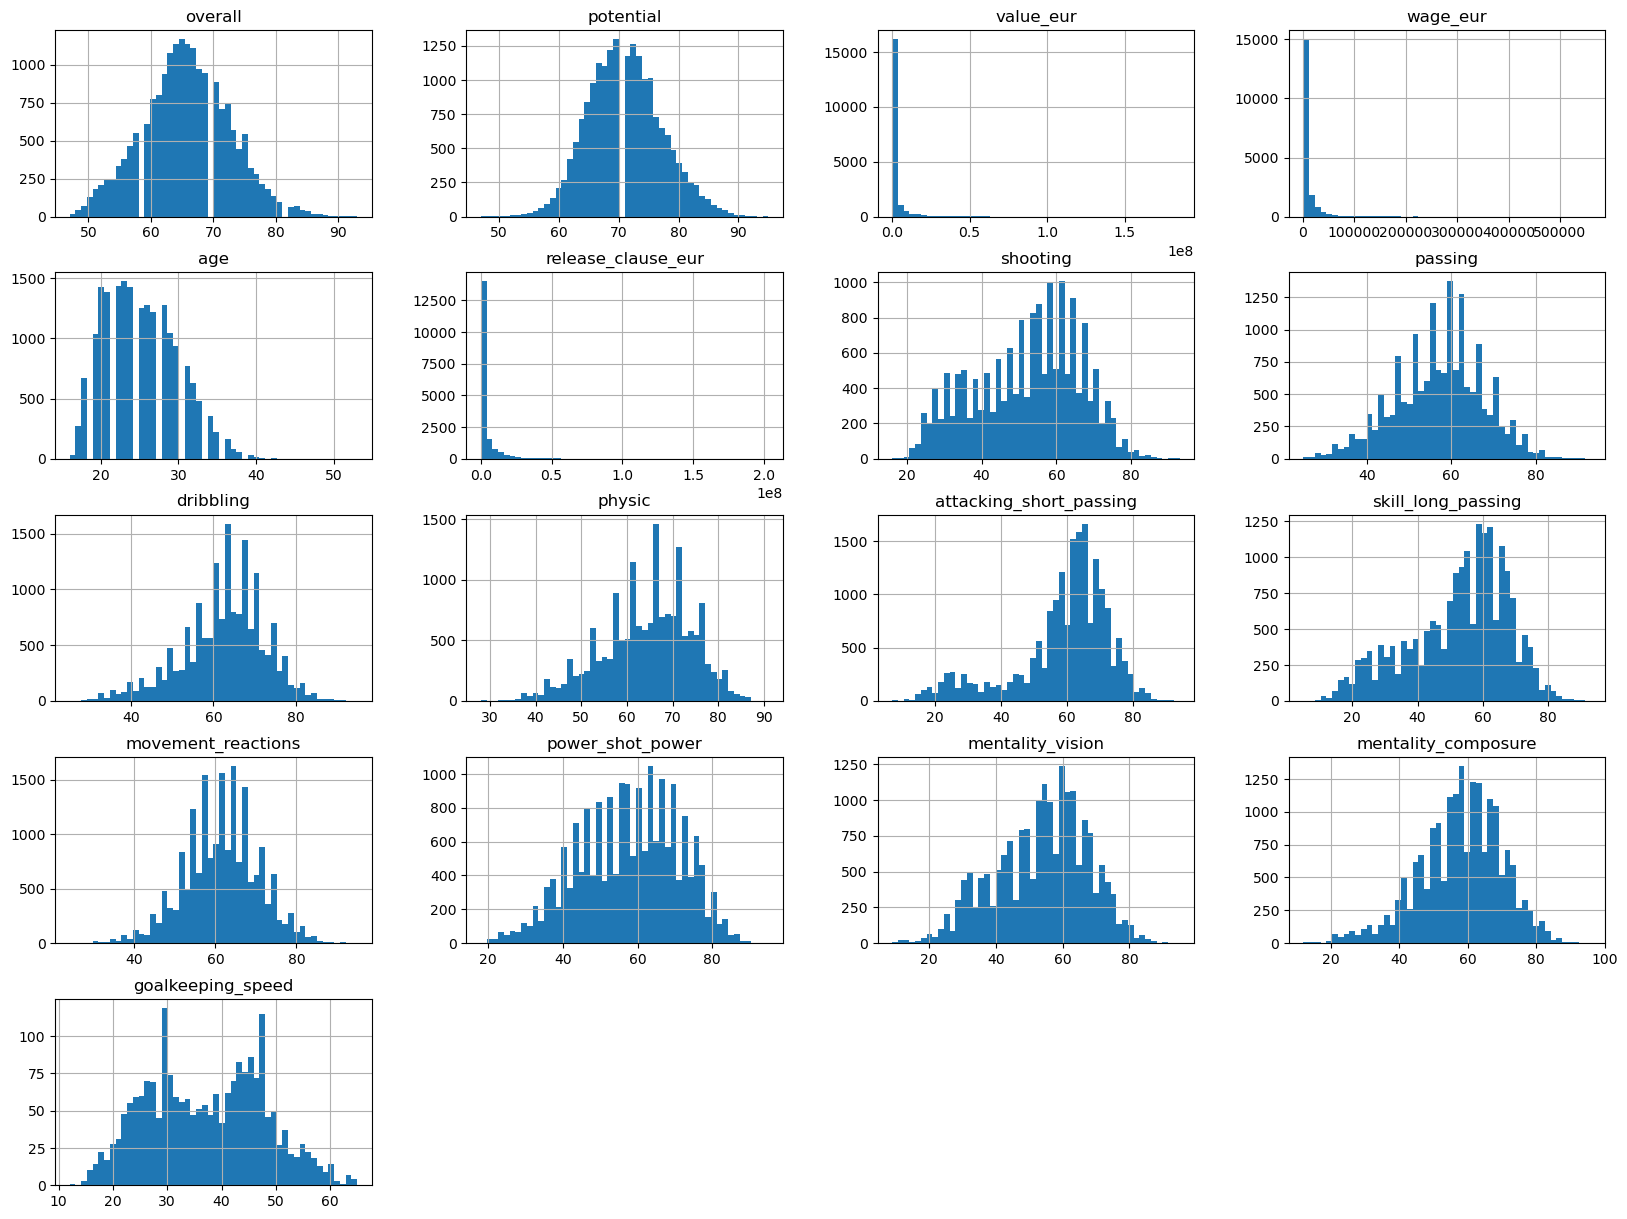

In [13]:
from matplotlib import pyplot as plt
#Exploratory data analysis (EDA) df_21
selected_columns_21.hist(bins=50, figsize=(20,15))
plt.show()

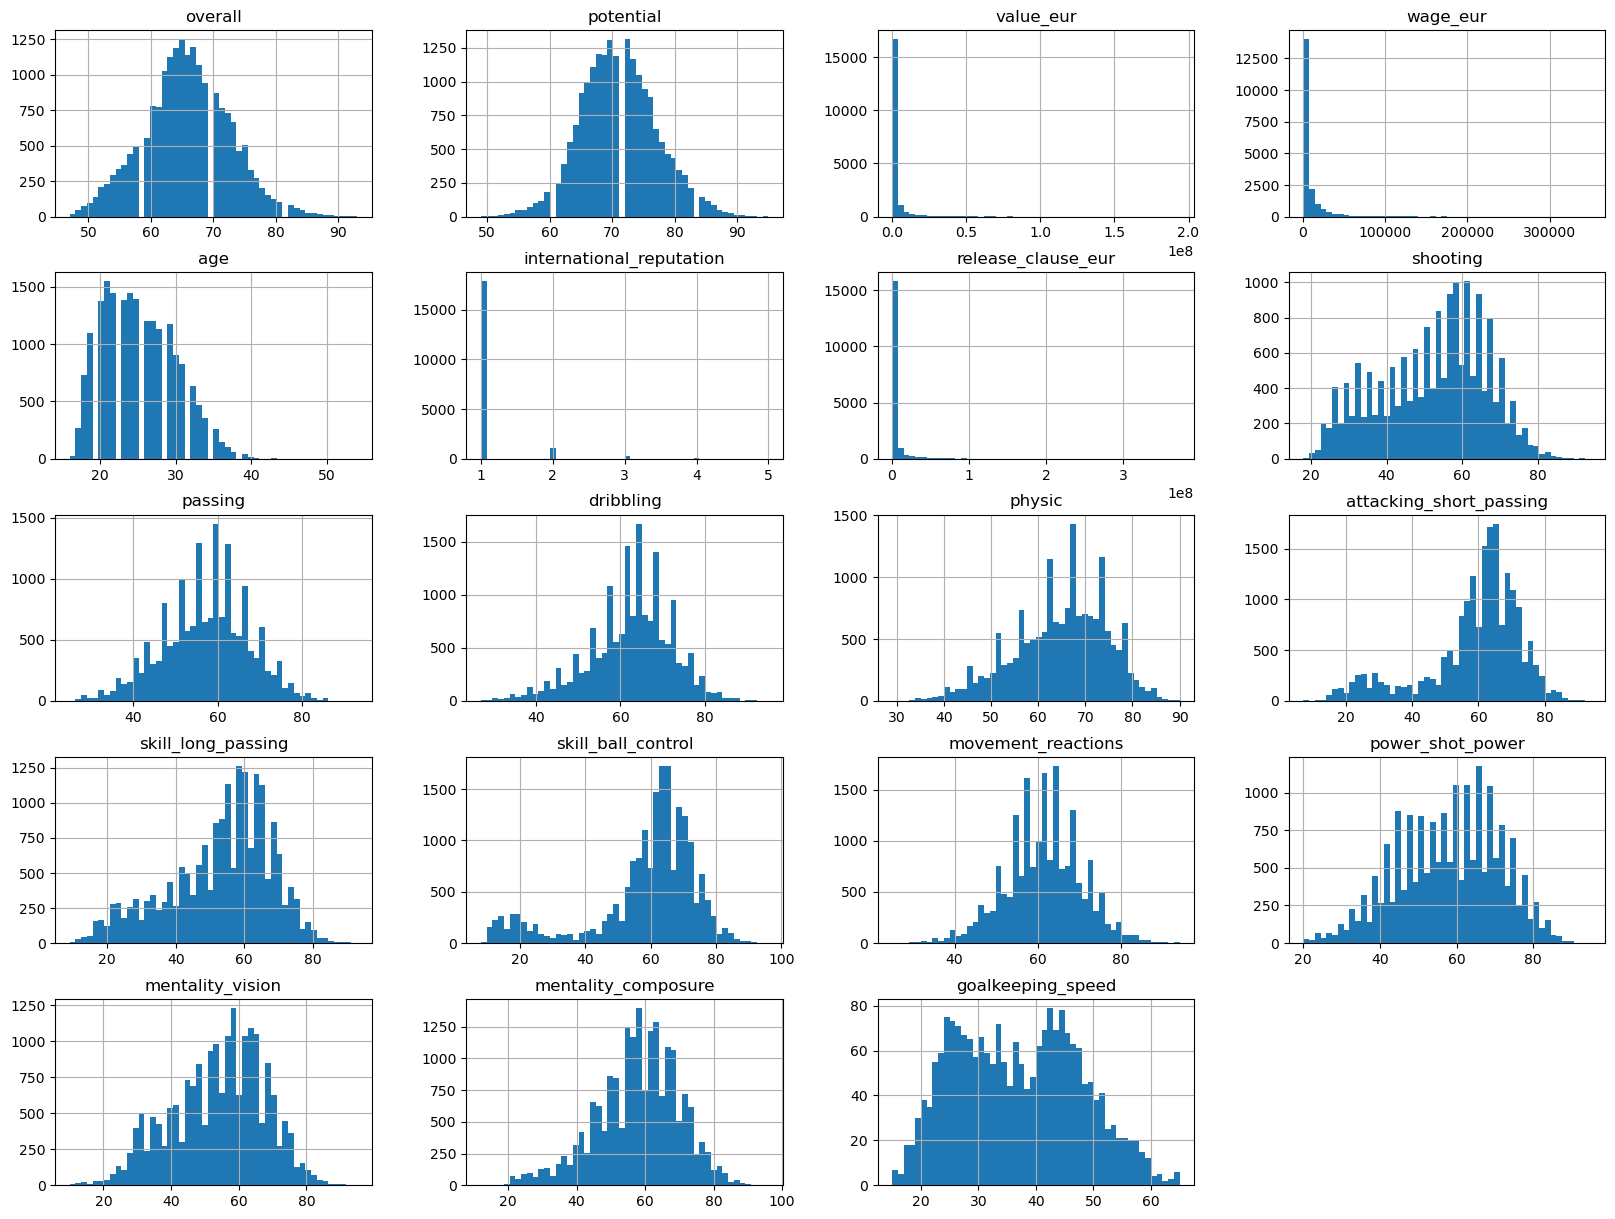

In [14]:
from matplotlib import pyplot as plt
#Exploratory data analysis (EDA) df_22
selected_columns_22.hist(bins=50, figsize=(20,15))
plt.show()

In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(selected_columns_21)
selected_columns_21 = pd.DataFrame(imputed_data, columns=selected_columns_21.columns)
selected_columns_21

,overall,potential,value_eur,wage_eur,age,release_clause_eur,shooting,passing,dribbling,physic,attacking_short_passing,skill_long_passing,movement_reactions,power_shot_power,mentality_vision,mentality_composure,goalkeeping_speed
0,93.0,93.0,103500000.0,560000.0,33.0,138400000.0,92.0,91.0,95.0,65.0,91.0,91.0,94.0,86.0,95.0,96.0,37.203553
1,92.0,92.0,63000000.0,220000.0,35.0,75900000.0,93.0,81.0,89.0,77.0,82.0,77.0,95.0,94.0,82.0,95.0,37.203553
2,91.0,91.0,111000000.0,240000.0,31.0,132000000.0,91.0,78.0,85.0,82.0,84.0,70.0,93.0,89.0,79.0,88.0,37.203553
3,91.0,91.0,132000000.0,270000.0,28.0,166500000.0,85.0,86.0,94.0,59.0,87.0,81.0,91.0,80.0,90.0,93.0,37.203553
4,91.0,91.0,129000000.0,370000.0,29.0,161000000.0,86.0,93.0,88.0,78.0,94.0,93.0,91.0,91.0,94.0,91.0,37.203553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,47.0,52.0,70000.0,1000.0,21.0,57000.0,23.0,26.0,27.0,48.0,31.0,25.0,48.0,35.0,25.0,40.0,37.203553
18940,47.0,53.0,70000.0,1000.0,21.0,72000.0,32.0,49.0,47.0,48.0,55.0,50.0,50.0,38.0,53.0,35.0,37.203553
18941,47.0,47.0,45000.0,2000.0,28.0,47000.0,37.0,49.0,46.0,59.0,56.0,56.0,44.0,49.0,44.0,35.0,37.203553
18942,47.0,67.0,130000.0,500.0,17.0,165000.0,46.0,40.0,53.0,40.0,45.0,37.0,53.0,50.0,49.0,45.0,37.203553


In [16]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(selected_columns_22)
selected_columns_22 = pd.DataFrame(imputed_data, columns=selected_columns_22.columns)
selected_columns_22     #this help to replace missing value with the mean of the whole data

,overall,potential,value_eur,wage_eur,age,international_reputation,release_clause_eur,shooting,passing,dribbling,physic,attacking_short_passing,skill_long_passing,skill_ball_control,movement_reactions,power_shot_power,mentality_vision,mentality_composure,goalkeeping_speed
0,93.0,93.0,78000000.0,320000.0,34.0,5.0,144300000.0,92.0,91.0,95.0,65.0,91.0,91.0,96.0,94.0,86.0,95.0,96.0,36.439962
1,92.0,92.0,119500000.0,270000.0,32.0,5.0,197200000.0,92.0,79.0,86.0,82.0,85.0,70.0,88.0,93.0,90.0,81.0,88.0,36.439962
2,91.0,91.0,45000000.0,270000.0,36.0,5.0,83300000.0,94.0,80.0,88.0,75.0,80.0,77.0,88.0,94.0,94.0,76.0,95.0,36.439962
3,91.0,91.0,129000000.0,270000.0,29.0,5.0,238700000.0,83.0,86.0,94.0,63.0,86.0,81.0,95.0,89.0,80.0,90.0,93.0,36.439962
4,91.0,91.0,125500000.0,350000.0,30.0,4.0,232200000.0,86.0,93.0,88.0,78.0,94.0,93.0,91.0,91.0,91.0,94.0,89.0,36.439962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,47.0,52.0,70000.0,1000.0,22.0,1.0,114000.0,35.0,46.0,48.0,49.0,50.0,48.0,49.0,53.0,46.0,43.0,37.0,36.439962
19235,47.0,59.0,110000.0,500.0,19.0,1.0,193000.0,39.0,50.0,46.0,51.0,51.0,50.0,42.0,49.0,49.0,49.0,47.0,36.439962
19236,47.0,55.0,100000.0,500.0,21.0,1.0,175000.0,37.0,45.0,49.0,52.0,49.0,49.0,49.0,46.0,50.0,46.0,36.0,36.439962
19237,47.0,60.0,110000.0,500.0,19.0,1.0,239000.0,46.0,36.0,48.0,42.0,38.0,33.0,45.0,48.0,48.0,40.0,47.0,36.439962


In [17]:
y_21=selected_columns_21['overall']      #i splitted the data
x_21=selected_columns_21.drop('overall',axis=1)   


In [18]:
y_22=selected_columns_22['overall']  #i splitted the data
x_22=selected_columns_22.drop('overall',axis=1)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_21)
scaled_data_21 = scaler.transform(x_21)
x_21=pd.DataFrame(scaled_data_21,columns=x_21.columns)
x_21.head() # the code is to ensure standardization to improve the performance of the machine learning algorithm.  

,potential,value_eur,wage_eur,age,release_clause_eur,shooting,passing,dribbling,physic,attacking_short_passing,skill_long_passing,movement_reactions,power_shot_power,mentality_vision,mentality_composure,goalkeeping_speed
0,3.586563,13.073165,27.857178,1.655055,13.695696,3.009606,3.493625,3.433013,0.058838,2.216206,2.522017,3.554438,2.119026,3.000047,3.137573,2.000382e-15
1,3.422893,7.809992,10.662997,2.080838,7.312715,3.085367,2.461857,2.800094,1.363898,1.598583,1.601260,3.664174,2.719163,2.052781,3.055051,2.000382e-15
2,3.259222,14.047827,11.674420,1.229273,13.042079,2.933845,2.152326,2.378148,1.907673,1.735833,1.140882,3.444701,2.344077,1.834181,2.477402,2.000382e-15
3,3.259222,16.776879,13.191553,0.590598,16.565484,2.479280,2.977741,3.327526,-0.593692,1.941707,1.864334,3.225227,1.668922,2.635714,2.890009,2.000382e-15
4,3.259222,16.387015,18.248665,0.803490,16.003782,2.555040,3.699979,2.694607,1.472653,2.422080,2.653554,3.225227,2.494112,2.927180,2.724966,2.000382e-15


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_22)
scaled_data_22 = scaler.transform(x_22)
x_22=pd.DataFrame(scaled_data_22,columns=x_22.columns)
x_22.head()   # the code is to ensure standardization to improve the performance of the machine learning algorithm.

,potential,value_eur,wage_eur,age,international_reputation,release_clause_eur,shooting,passing,dribbling,physic,attacking_short_passing,skill_long_passing,skill_ball_control,movement_reactions,power_shot_power,mentality_vision,mentality_composure,goalkeeping_speed
0,3.60178,9.889601,15.998022,1.851089,10.525295,9.591752,2.992852,3.548135,3.564477,0.019139,2.217457,2.524112,2.252136,3.599846,2.139433,3.006228,3.131025,-3.971441e-15
1,3.43747,15.350958,13.425844,1.429869,10.525295,13.244084,2.992852,2.284233,2.575529,1.860333,1.803392,1.126551,1.772039,3.489252,2.442649,1.980597,2.473077,-3.971441e-15
2,3.27316,5.546836,13.425844,2.272309,10.525295,5.380179,3.143798,2.389558,2.795295,1.102194,1.458338,1.592404,1.772039,3.599846,2.745866,1.614300,3.048782,-3.971441e-15
3,3.27316,16.601147,13.425844,0.798039,10.525295,16.109335,2.313597,3.021509,3.454594,-0.197472,1.872403,1.858606,2.192124,3.046874,1.684607,2.639931,2.884295,-3.971441e-15
4,3.27316,16.140551,17.541329,1.008649,7.830520,15.660560,2.540015,3.758786,2.795295,1.427111,2.424490,2.657213,1.952075,3.268063,2.518454,2.932969,2.555321,-3.971441e-15


In [21]:
from sklearn.model_selection import train_test_split  # this is the library that helps in trainig and texting of the model

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x_21, y_21, test_size=0.2, random_state=42)

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
rf=RandomForestRegressor(max_depth=8, n_estimators=50)

In [25]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, n_estimators=50)

In [26]:
ypred=rf.predict(X_test)

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error  #it is used to check the perfprmance of the model

In [28]:
mean_absolute_error(y_test, ypred)

0.4175803325605208

In [29]:
np.sqrt(mean_squared_error(y_test, ypred))

0.6403208428633537

In [30]:
ypred

array([59.84669316, 64.05461722, 57.88716303, ..., 73.38219749,
       62.84206145, 61.44418062])

In [31]:
mae = mean_absolute_error(y_test,ypred)

mae

0.4175803325605208

In [32]:
y_test

15024    60.0
11771    64.0
16615    58.0
4201     71.0
13480    62.0
         ... 
8404     67.0
5412     69.0
3755     72.0
11886    63.0
13592    62.0
Name: overall, Length: 3789, dtype: float64

In [33]:
rf.score(X_test,y_test)

0.991301347050004

In [34]:
rmse = np.sqrt(mean_squared_error(y_test,ypred))
rmse

0.6403208428633537

In [35]:
from sklearn.ensemble import GradientBoostingRegressor  #it is used to check the perfprmance of the model


In [36]:
clf = GradientBoostingRegressor(n_estimators=100, learning_rate=0.001, max_depth=3)


In [37]:
clf.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.001)

In [38]:
ypred=clf.predict(X_test)

In [39]:
mae = mean_absolute_error(y_test,ypred)

mae

4.957268732745825

In [40]:
rmse = np.sqrt(mean_squared_error(y_test,ypred))
rmse

6.313059009246339

In [41]:
import xgboost as xgb                      #it is used to check the perfprmance of the model
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

model = XGBRegressor(n_estimators=100, learning_rate=0.1)

model.fit(X_train, y_train)

ypred = model.predict(X_test)

mse = mean_squared_error(y_test, ypred)
mse


0.26570826165053213

In [42]:
from sklearn.model_selection import GridSearchCV     
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [43]:
grid_param={
    'n_estimators':[20,30,40],
    'max_depth':[5,10,15]
}


In [44]:
ranF=RandomForestRegressor(criterion='absolute_error')

In [45]:
ranF_grid_search=GridSearchCV(ranF,grid_param,cv=5,scoring ='neg_mean_absolute_error')

In [46]:
ranF_grid_search.fit(x_21,y_21)  

GridSearchCV(cv=5, estimator=RandomForestRegressor(criterion='absolute_error'),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [20, 30, 40]},
             scoring='neg_mean_absolute_error')

In [47]:
ypred21=ranF_grid_search.best_estimator_.predict(X_test)
best_model21=ranF_grid_search.best_estimator_
best_model21

RandomForestRegressor(criterion='absolute_error', max_depth=15, n_estimators=40)

In [48]:
ypred22=ranF_grid_search.best_estimator_.predict(X_test)
best_model22=ranF_grid_search.best_estimator_
best_model22

RandomForestRegressor(criterion='absolute_error', max_depth=15, n_estimators=40)

In [49]:
from sklearn.metrics import mean_absolute_error,mean_squared_error  #it is used to check the perfprmance of the model

In [50]:
mean_absolute_error(y_test, ypred22)

0.1704869358669835

In [51]:
np.sqrt(mean_squared_error(y_test, ypred22))

0.30467580410282125

In [52]:
ypred22

array([59.875, 64.05 , 58.   , ..., 72.225, 63.   , 61.475])

In [53]:
mae = mean_absolute_error(y_test,ypred22)

mae

0.1704869358669835

In [54]:
y_test

15024    60.0
11771    64.0
16615    58.0
4201     71.0
13480    62.0
         ... 
8404     67.0
5412     69.0
3755     72.0
11886    63.0
13592    62.0
Name: overall, Length: 3789, dtype: float64

In [55]:
rf.score(X_test,y_test)

0.991301347050004

In [56]:
rmse = np.sqrt(mean_squared_error(y_test,ypred22))
rmse

0.30467580410282125

In [57]:
import pickle   # this wouild save the code

In [58]:
filename='midsem.pkl'
pickle.dump(best_model21, open(filename,'wb'))

In [59]:
filename='scaler.pkl'
pickle.dump(scaler, open(filename,'wb'))

In [62]:
!pip install streamlit  # this code would deploy it on the web
import streamlit as st


  Using cached streamlit-1.27.2-py2.py3-none-any.whl (7.6 MB)
  Using cached altair-5.1.2-py3-none-any.whl (516 kB)
  Using cached cachetools-5.3.1-py3-none-any.whl (9.3 kB)
  Using cached tenacity-8.2.3-py3-none-any.whl (24 kB)
  Using cached validators-0.22.0-py3-none-any.whl (26 kB)
  Using cached tzlocal-5.2-py3-none-any.whl (17 kB)
  Using cached blinker-1.6.3-py3-none-any.whl (13 kB)
  Using cached rich-13.6.0-py3-none-any.whl (239 kB)
  Using cached GitPython-3.1.40-py3-none-any.whl (190 kB)
  Using cached pydeck-0.8.1b0-py2.py3-none-any.whl (4.8 MB)
     ---------------------------------------- 24.3/24.3 MB 1.6 MB/s eta 0:00:00
  Using cached gitdb-4.0.11-py3-none-any.whl (62 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl (87 kB)
  Using cached Pygments-2.16.1-py3-none-any.whl (1.2 MB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Using cached smmap-5.0.1-py3-none-any.whl (24 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl (10.0 kB)
  Attempting uninsta

In [63]:
filename='midsem.pkl'
pickle.dump(best_model21, open(filename,'wb'))

In [66]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.2.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\agyei\onedrive\documents\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: daal4py, imbalanced-learn, scikit-learn-intelex
